In [1]:
import pandas as pd
%pylab inline
import sklearn.ensemble
model= sklearn.ensemble.forest.RandomForestClassifier()

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
df = pd.read_csv("C:/Users/uday/Downloads/train.csv")

In [5]:
df
pwd


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [6]:
df.shape

(891, 12)

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
342/891

0.3838383838383838

### EDA

Learn about the data
for each variable:
<li> is it categorical?
<li> if not, min max avg values?
<li> if it is , what are the categories?
<li> are there missing values?
<li> someething about the distribution of the variable.


In [7]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

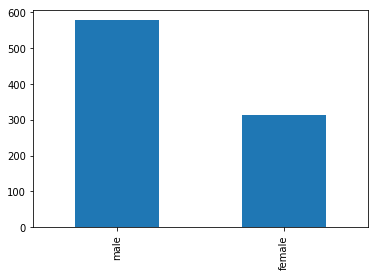

In [8]:
df.Sex.value_counts().plot(kind='bar')

In [9]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [10]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [11]:
df.head(10 )

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [12]:
df.PassengerId.count()

891

In [13]:
df.Sex.count()

891

In [14]:
df.Age.count()

714

In [15]:
df.Age.mean()

29.69911764705882

In [16]:
mean=df.Age.mean()
df.Age=df.Age.fillna(value=mean)

In [17]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [39]:
df_mod=df[['Survived', 'Pclass', 'Sex', 'Age']]
df_mod

Survived  Pclass     Sex        Age
0           0       3    male  22.000000
1           1       1  female  38.000000
2           1       3  female  26.000000
3           1       1  female  35.000000
4           0       3    male  35.000000
5           0       3    male  29.699118
6           0       1    male  54.000000
7           0       3    male   2.000000
8           1       3  female  27.000000
9           1       2  female  14.000000
10          1       3  female   4.000000
11          1       1  female  58.000000
12          0       3    male  20.000000
13          0       3    male  39.000000
14          0       3  female  14.000000
15          1       2  female  55.000000
16          0       3    male   2.000000
17          1       2    male  29.699118
18          0       3  female  31.000000
19          1       3  female  29.699118
20          0       2    male  35.000000
21          1       2    male  34.000000
22          1       3  female  15.000000
23          1       1    male  28.000000
24          0       3  female   8.000000
25          1       3  female  38.000000
26          0       3    male  29.699118
27          0       1    male  19.000000
28          1       3  female  29.699118
29          0       3    male  29.699118
..        ...     ...     ...        ...
861         0       2    male  21.000000
862         1       1  female  48.000000
863         0       3  female  29.699118
864         0       2    male  24.000000
865         1       2  female  42.000000
866         1       2  female  27.000000
867         0       1    male  31.000000
868         0       3    male  29.699118
869         1       3    male   4.000000
870         0       3    male  26.000000
871         1       1  female  47.000000
872         0       1    male  33.000000
873         0       3    male  47.000000
874         1       2  female  28.000000
875         1       3  female  15.000000
876         0       3    male  20.000000
877         0       3    male  19.000000
878         0       3    male  29.699118
879         1       1  female  56.000000
880         1       2  female  25.000000
881         0       3    male  33.000000
882         0       3  female  22.000000
883         0       2    male  28.000000
884         0       3    male  25.000000
885         0       3  female  39.000000
886         0       2    male  27.000000
887         1       1  female  19.000000
888         0       3  female  29.699118
889         1       1    male  26.000000
890         0       3    male  32.000000

[891 rows x 4 columns]

In [52]:
df_mod['sex_mod']=le.fit_transform(df_mod['Sex'].astype(str))
df_mod

C:\Users\uday\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Survived  Pclass     Sex        Age  sex_mod
0           0       3    male  22.000000        1
1           1       1  female  38.000000        0
2           1       3  female  26.000000        0
3           1       1  female  35.000000        0
4           0       3    male  35.000000        1
5           0       3    male  29.699118        1
6           0       1    male  54.000000        1
7           0       3    male   2.000000        1
8           1       3  female  27.000000        0
9           1       2  female  14.000000        0
10          1       3  female   4.000000        0
11          1       1  female  58.000000        0
12          0       3    male  20.000000        1
13          0       3    male  39.000000        1
14          0       3  female  14.000000        0
15          1       2  female  55.000000        0
16          0       3    male   2.000000        1
17          1       2    male  29.699118        1
18          0       3  female  31.000000        0
19          1       3  female  29.699118        0
20          0       2    male  35.000000        1
21          1       2    male  34.000000        1
22          1       3  female  15.000000        0
23          1       1    male  28.000000        1
24          0       3  female   8.000000        0
25          1       3  female  38.000000        0
26          0       3    male  29.699118        1
27          0       1    male  19.000000        1
28          1       3  female  29.699118        0
29          0       3    male  29.699118        1
..        ...     ...     ...        ...      ...
861         0       2    male  21.000000        1
862         1       1  female  48.000000        0
863         0       3  female  29.699118        0
864         0       2    male  24.000000        1
865         1       2  female  42.000000        0
866         1       2  female  27.000000        0
867         0       1    male  31.000000        1
868         0       3    male  29.699118        1
869         1       3    male   4.000000        1
870         0       3    male  26.000000        1
871         1       1  female  47.000000        0
872         0       1    male  33.000000        1
873         0       3    male  47.000000        1
874         1       2  female  28.000000        0
875         1       3  female  15.000000        0
876         0       3    male  20.000000        1
877         0       3    male  19.000000        1
878         0       3    male  29.699118        1
879         1       1  female  56.000000        0
880         1       2  female  25.000000        0
881         0       3    male  33.000000        1
882         0       3  female  22.000000        0
883         0       2    male  28.000000        1
884         0       3    male  25.000000        1
885         0       3  female  39.000000        0
886         0       2    male  27.000000        1
887         1       1  female  19.000000        0
888         0       3  female  29.699118        0
889         1       1    male  26.000000        1
890         0       3    male  32.000000        1

[891 rows x 5 columns]

In [53]:
predictors=['Pclass','sex_mod','Age']
predictors

['Pclass', 'sex_mod', 'Age']

In [54]:
xtrain=(df_mod[predictors]).values
ytrain=(df_mod.Survived).values

ytrain

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [55]:
xtrain

array([[  3.        ,   1.        ,  22.        ],
       [  1.        ,   0.        ,  38.        ],
       [  3.        ,   0.        ,  26.        ],
       ..., 
       [  3.        ,   0.        ,  29.69911765],
       [  1.        ,   1.        ,  26.        ],
       [  3.        ,   1.        ,  32.        ]])

In [56]:
model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
dfTest = pd.read_csv("C:/Users/uday/Downloads/test.csv")

In [58]:
dfTest

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

In [85]:
dfTest_mod= dfTest[['PassengerId','Pclass', 'Sex', 'Age']]
dfTest_mod

PassengerId  Pclass     Sex   Age
0            892       3    male  34.5
1            893       3  female  47.0
2            894       2    male  62.0
3            895       3    male  27.0
4            896       3  female  22.0
5            897       3    male  14.0
6            898       3  female  30.0
7            899       2    male  26.0
8            900       3  female  18.0
9            901       3    male  21.0
10           902       3    male   NaN
11           903       1    male  46.0
12           904       1  female  23.0
13           905       2    male  63.0
14           906       1  female  47.0
15           907       2  female  24.0
16           908       2    male  35.0
17           909       3    male  21.0
18           910       3  female  27.0
19           911       3  female  45.0
20           912       1    male  55.0
21           913       3    male   9.0
22           914       1  female   NaN
23           915       1    male  21.0
24           916       1  female  48.0
25           917       3    male  50.0
26           918       1  female  22.0
27           919       3    male  22.5
28           920       1    male  41.0
29           921       3    male   NaN
..           ...     ...     ...   ...
388         1280       3    male  21.0
389         1281       3    male   6.0
390         1282       1    male  23.0
391         1283       1  female  51.0
392         1284       3    male  13.0
393         1285       2    male  47.0
394         1286       3    male  29.0
395         1287       1  female  18.0
396         1288       3    male  24.0
397         1289       1  female  48.0
398         1290       3    male  22.0
399         1291       3    male  31.0
400         1292       1  female  30.0
401         1293       2    male  38.0
402         1294       1  female  22.0
403         1295       1    male  17.0
404         1296       1    male  43.0
405         1297       2    male  20.0
406         1298       2    male  23.0
407         1299       1    male  50.0
408         1300       3  female   NaN
409         1301       3  female   3.0
410         1302       3  female   NaN
411         1303       1  female  37.0
412         1304       3  female  28.0
413         1305       3    male   NaN
414         1306       1  female  39.0
415         1307       3    male  38.5
416         1308       3    male   NaN
417         1309       3    male   NaN

[418 rows x 4 columns]

In [86]:
meanage=dfTest_mod.Age.mean()
dfTest_mod.Age=dfTest_mod.Age.fillna(value=meanage)

C:\Users\uday\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [87]:
dfTest_mod.count()

PassengerId    418
Pclass         418
Sex            418
Age            418
dtype: int64

In [88]:
dfTest_mod['sex_mod']=le.fit_transform(dfTest_mod['Sex'].astype(str))
dfTest_mod

C:\Users\uday\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


PassengerId  Pclass     Sex       Age  sex_mod
0            892       3    male  34.50000        1
1            893       3  female  47.00000        0
2            894       2    male  62.00000        1
3            895       3    male  27.00000        1
4            896       3  female  22.00000        0
5            897       3    male  14.00000        1
6            898       3  female  30.00000        0
7            899       2    male  26.00000        1
8            900       3  female  18.00000        0
9            901       3    male  21.00000        1
10           902       3    male  30.27259        1
11           903       1    male  46.00000        1
12           904       1  female  23.00000        0
13           905       2    male  63.00000        1
14           906       1  female  47.00000        0
15           907       2  female  24.00000        0
16           908       2    male  35.00000        1
17           909       3    male  21.00000        1
18           910       3  female  27.00000        0
19           911       3  female  45.00000        0
20           912       1    male  55.00000        1
21           913       3    male   9.00000        1
22           914       1  female  30.27259        0
23           915       1    male  21.00000        1
24           916       1  female  48.00000        0
25           917       3    male  50.00000        1
26           918       1  female  22.00000        0
27           919       3    male  22.50000        1
28           920       1    male  41.00000        1
29           921       3    male  30.27259        1
..           ...     ...     ...       ...      ...
388         1280       3    male  21.00000        1
389         1281       3    male   6.00000        1
390         1282       1    male  23.00000        1
391         1283       1  female  51.00000        0
392         1284       3    male  13.00000        1
393         1285       2    male  47.00000        1
394         1286       3    male  29.00000        1
395         1287       1  female  18.00000        0
396         1288       3    male  24.00000        1
397         1289       1  female  48.00000        0
398         1290       3    male  22.00000        1
399         1291       3    male  31.00000        1
400         1292       1  female  30.00000        0
401         1293       2    male  38.00000        1
402         1294       1  female  22.00000        0
403         1295       1    male  17.00000        1
404         1296       1    male  43.00000        1
405         1297       2    male  20.00000        1
406         1298       2    male  23.00000        1
407         1299       1    male  50.00000        1
408         1300       3  female  30.27259        0
409         1301       3  female   3.00000        0
410         1302       3  female  30.27259        0
411         1303       1  female  37.00000        0
412         1304       3  female  28.00000        0
413         1305       3    male  30.27259        1
414         1306       1  female  39.00000        0
415         1307       3    male  38.50000        1
416         1308       3    male  30.27259        1
417         1309       3    male  30.27259        1

[418 rows x 5 columns]

In [89]:
predictors=['Pclass','sex_mod','Age']
predictors

['Pclass', 'sex_mod', 'Age']

In [90]:
xtest= (dfTest_mod[predictors]).values
xtest

array([[  3.        ,   1.        ,  34.5       ],
       [  3.        ,   0.        ,  47.        ],
       [  2.        ,   1.        ,  62.        ],
       ..., 
       [  3.        ,   1.        ,  38.5       ],
       [  3.        ,   1.        ,  30.27259036],
       [  3.        ,   1.        ,  30.27259036]])

In [91]:
predicted= model.predict(xtest)

In [92]:
dfTest_mod['Survived']=predicted
dfTest_mod

C:\Users\uday\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


PassengerId  Pclass     Sex       Age  sex_mod  Survived
0            892       3    male  34.50000        1         0
1            893       3  female  47.00000        0         0
2            894       2    male  62.00000        1         1
3            895       3    male  27.00000        1         1
4            896       3  female  22.00000        0         1
5            897       3    male  14.00000        1         0
6            898       3  female  30.00000        0         0
7            899       2    male  26.00000        1         0
8            900       3  female  18.00000        0         0
9            901       3    male  21.00000        1         0
10           902       3    male  30.27259        1         0
11           903       1    male  46.00000        1         0
12           904       1  female  23.00000        0         1
13           905       2    male  63.00000        1         1
14           906       1  female  47.00000        0         1
15           907       2  female  24.00000        0         1
16           908       2    male  35.00000        1         0
17           909       3    male  21.00000        1         0
18           910       3  female  27.00000        0         1
19           911       3  female  45.00000        0         0
20           912       1    male  55.00000        1         0
21           913       3    male   9.00000        1         1
22           914       1  female  30.27259        0         1
23           915       1    male  21.00000        1         0
24           916       1  female  48.00000        0         1
25           917       3    male  50.00000        1         0
26           918       1  female  22.00000        0         1
27           919       3    male  22.50000        1         0
28           920       1    male  41.00000        1         0
29           921       3    male  30.27259        1         0
..           ...     ...     ...       ...      ...       ...
388         1280       3    male  21.00000        1         0
389         1281       3    male   6.00000        1         1
390         1282       1    male  23.00000        1         1
391         1283       1  female  51.00000        0         1
392         1284       3    male  13.00000        1         1
393         1285       2    male  47.00000        1         0
394         1286       3    male  29.00000        1         0
395         1287       1  female  18.00000        0         1
396         1288       3    male  24.00000        1         0
397         1289       1  female  48.00000        0         1
398         1290       3    male  22.00000        1         0
399         1291       3    male  31.00000        1         0
400         1292       1  female  30.00000        0         1
401         1293       2    male  38.00000        1         0
402         1294       1  female  22.00000        0         1
403         1295       1    male  17.00000        1         1
404         1296       1    male  43.00000        1         1
405         1297       2    male  20.00000        1         0
406         1298       2    male  23.00000        1         0
407         1299       1    male  50.00000        1         0
408         1300       3  female  30.27259        0         0
409         1301       3  female   3.00000        0         0
410         1302       3  female  30.27259        0         0
411         1303       1  female  37.00000        0         1
412         1304       3  female  28.00000        0         0
413         1305       3    male  30.27259        1         0
414         1306       1  female  39.00000        0         1
415         1307       3    male  38.50000        1         0
416         1308       3    male  30.27259        1         0
417         1309       3    male  30.27259        1         0

[418 rows x 6 columns]

In [93]:
pd.crosstab(dfTest_mod.Sex, dfTest_mod.Survived)

Survived    0    1
Sex               
female     51  101
male      236   30

In [99]:
result = dfTest_mod[['PassengerId', 'Survived']]

In [100]:
result.to_csv("C:/Users/uday/Downloads/result_Titanic_first.csv", index=True)